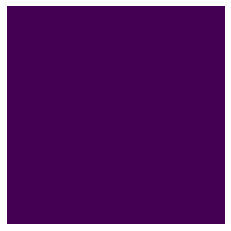

In [8]:
import cv2
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/workspaces/mmsegmentation-1/MAEOUT_240416/00001.png'

# Load the image using OpenCV
img = cv2.imread(image_path, 0)

# Convert BGR to RGB (OpenCV uses BGR by default)

# Display the image using Matplotlib
plt.imshow(img*255)
plt.axis('off')  # Turn off axis
plt.show()


In [5]:
print(img.shape)

(512, 512)
